In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
b = [[5.456138803863525, 0.12929999828338623], 
[6.539526782226562, 0.18539999425411224],
[43.199859033203126, 0.10289999842643738], 
[3.673975510406494, 0.2800000011920929], 
[2.148836818122864, 0.4392000138759613], 
[0.8920869839668274, 0.7196000218391418], 
[0.7946466853618622, 0.7268000245094299], 
[0.7019237666130066, 0.8007000088691711], 
[1.5283966544151306, 0.6273000240325928]]

for i in range(1,10):
    l = []
    a = []
    with open('./loss_{}.pkl'.format(i), 'rb+') as f:
        l = pickle.load(f)
    with open('./accuracy_{}.pkl'.format(i), 'rb+') as f:
        a = pickle.load(f)
    print(len(a))
    continue
    l = l[:, i-1]
    a = a[:, i-1]
    a = list(a)
    l = list(l)
    a.append(b[i-1][1])
    l.append(b[i-1][0])
    with open('./loss_c_{}.pkl'.format(i), 'wb+') as f:
        pickle.dump(l,f)
    with open('./accuracy_c_{}.pkl'.format(i), 'wb+') as f:
        pickle.dump(a,f)

18
18
18
18
18
18
18
18
18


In [3]:
# b = [[5.456138803863525, 0.12929999828338623], 
# [6.539526782226562, 0.18539999425411224],
# [43.199859033203126, 0.10289999842643738], 
# [3.673975510406494, 0.2800000011920929], 
# [2.148836818122864, 0.4392000138759613], 
# [0.8920869839668274, 0.7196000218391418], 
# [0.7946466853618622, 0.7268000245094299], 
# [0.7019237666130066, 0.8007000088691711], 
# [1.5283966544151306, 0.6273000240325928]] 

frac_list = []
i = 0.1
while i < 1:
    frac_list.append(i)
    i += 0.05
frac_list

[0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.6,
 0.65,
 0.7000000000000001,
 0.7500000000000001,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003]

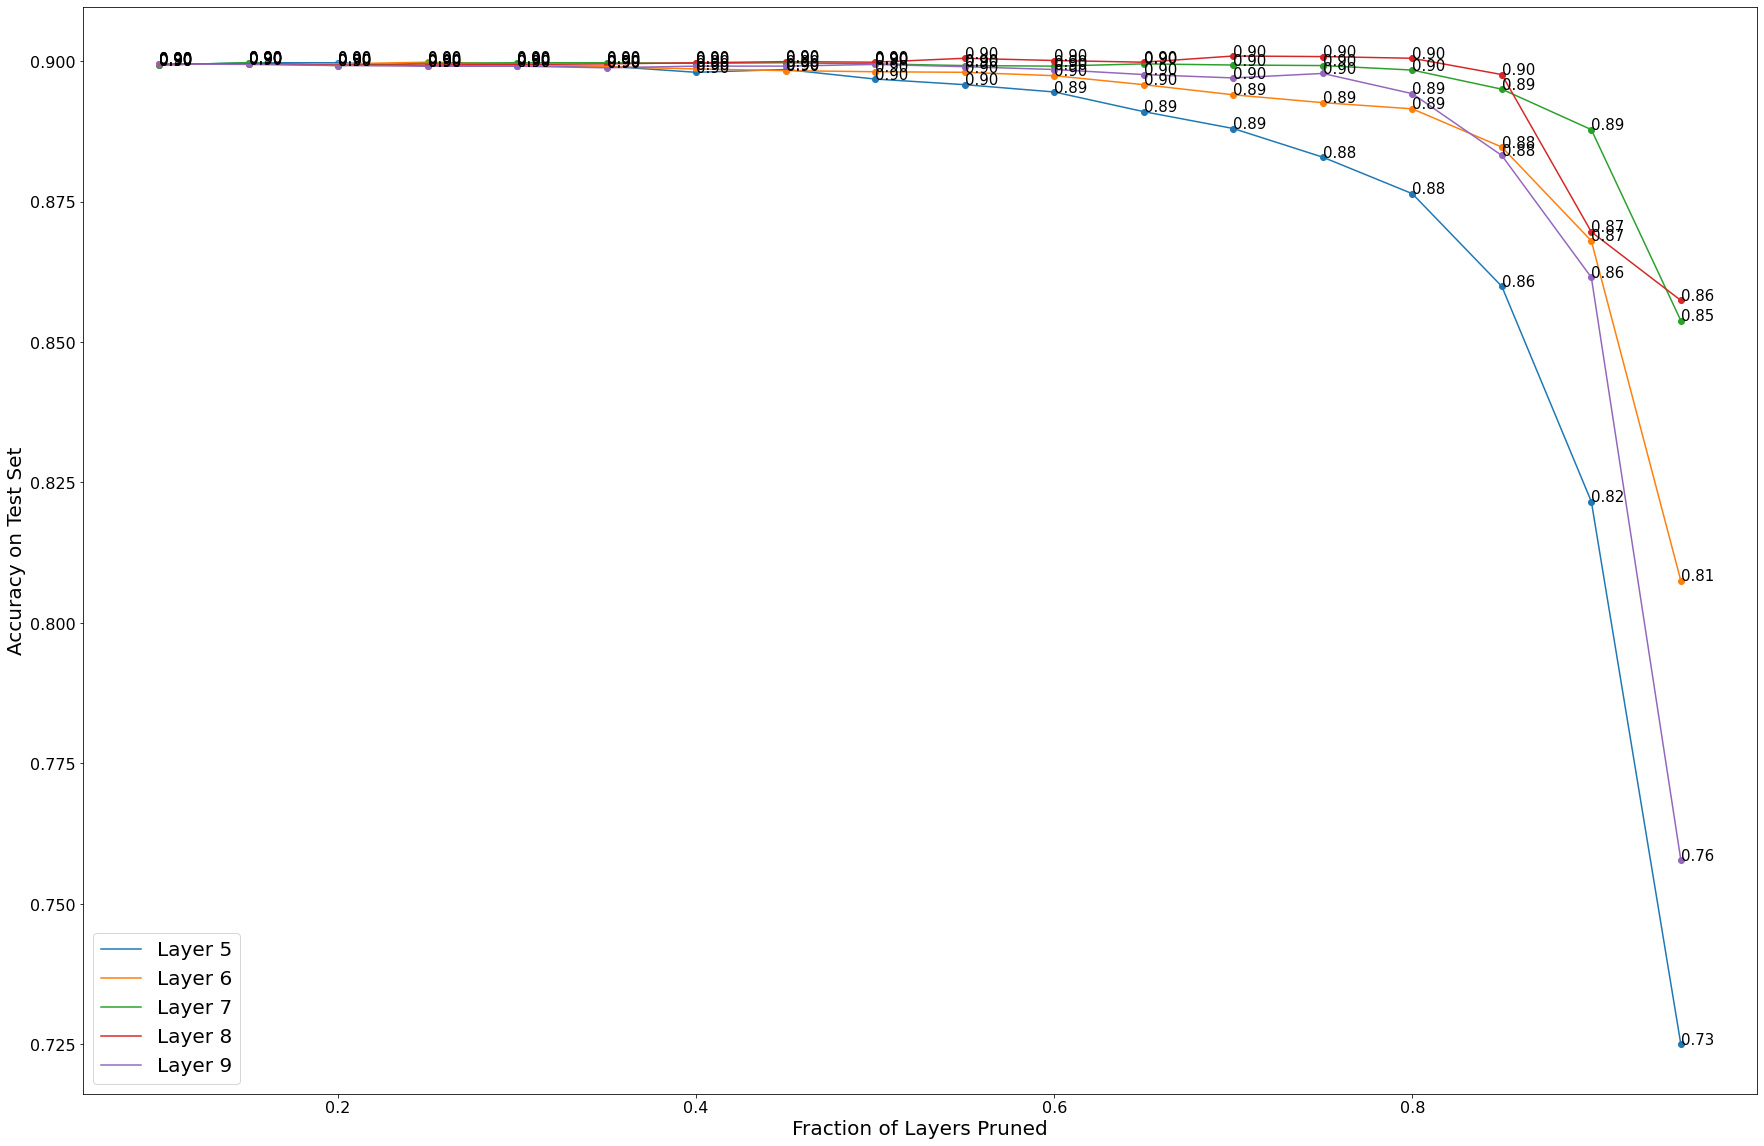

In [28]:
# fig = plt.figure()
import matplotlib
fig = plt.figure(figsize=(30,20))
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
# plt.title('lol')
plt.ylabel('Accuracy on Test Set', fontsize=20)
# plt.bar(range(5),height = y,width= 0.4,align='center')
# plt.xticks(range(5), x, rotation = 70)

plt.xlabel('Fraction of Layers Pruned', fontsize=20)
for i in range(5,10):
    with open('./accuracy_{}.pkl'.format(i), 'rb+') as f:
        l = pickle.load(f)
#     with open('./accuracy_{}.pkl'.format(i), 'rb+') as f:
#         a = pickle.load(f)
    line = plt.plot(frac_list,list(l), label = "Layer {}".format(i))
#     plt.legend([line], ['Layer {}'.format(i)])
    plt.scatter(frac_list, list(l))
    for i in range(len(frac_list)):
        plt.annotate(s = '%0.2f'%list(l)[i], xy = (frac_list[i], list(l)[i]), fontsize = 15)
    plt.legend(loc=3, fontsize=20)
    plt.savefig('./layerVacc_5to9.png',bbox_inches = 'tight')